In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("dplyr") 
install.packages("stats")
install.packages("caret") 
install.packages("randomForest",dependencies=TRUE)
install.packages("groupdata2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 852103 bytes (832 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [40]:
%%R
library(stats)
library(dplyr)
library(randomForest)
library(groupdata2)
library(caret)

In [41]:
%%R
data = read.csv('/content/drive/MyDrive/Data science/diabetes.csv')
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [42]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [43]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 500 


In [44]:
%%R
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE,prob = c(07.,0.3))
train <- data[ind==1,]
test <- data[ind==2,]

In [45]:
%%R
set.seed(122)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 2,
                   importance = TRUE,
                   proximity = TRUE)

In [46]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 491   0
         1   0 471
                                     
               Accuracy : 1          
                 95% CI : (0.9962, 1)
    No Information Rate : 0.5104     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5104     
         Detection Rate : 0.5104     
   Detection Prevalence : 0.5104     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [47]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  8  1
         1  1 28
                                          
               Accuracy : 0.9474          
                 95% CI : (0.8225, 0.9936)
    No Information Rate : 0.7632          
    P-Value [Acc > NIR] : 0.002787        
                                          
                  Kappa : 0.8544          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.8889          
            Specificity : 0.9655          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.9655          
             Prevalence : 0.2368          
         Detection Rate : 0.2105          
   Detection Prevalence : 0.2368          
      Balanced Accuracy : 0.9272          
                                          
       'Positive' Class : 0               
                                    

mtry = 2  OOB error = 13.41% 
Searching left ...
mtry = 1 	OOB error = 14.03% 
-0.04651163 0.2 
Searching right ...
mtry = 8 	OOB error = 13.72% 
-0.02325581 0.2 


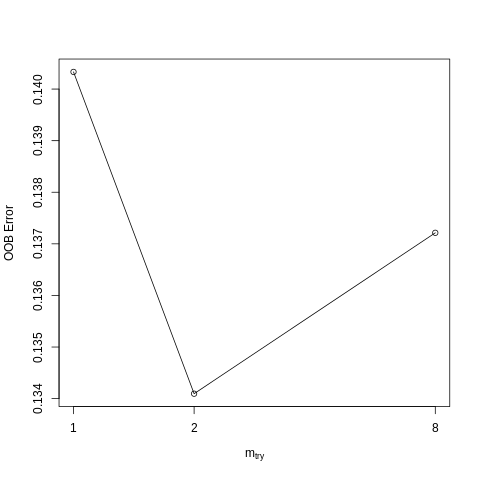

In [48]:
%%R
t <- tuneRF(train[,-9], train[,9],
            stepFactor = 6,
            plot = TRUE,
            ntreeTry = 800,
            trace = TRUE,
            improve = 0.2)

In [19]:
#if we remove the two least significant variable . 

In [49]:
%%R
set.seed(122)
rf <- randomForest(Outcome~Glucose+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age, data = train,
                   ntree = 550, 
                   mtry = 2,
                   importance = TRUE,
                   proximity = TRUE)

In [50]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 491   0
         1   0 471
                                     
               Accuracy : 1          
                 95% CI : (0.9962, 1)
    No Information Rate : 0.5104     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5104     
         Detection Rate : 0.5104     
   Detection Prevalence : 0.5104     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [51]:
%%R
p2 <- predict(rf,test)
confusionMatrix(p2,test$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  8  2
         1  1 27
                                          
               Accuracy : 0.9211          
                 95% CI : (0.7862, 0.9834)
    No Information Rate : 0.7632          
    P-Value [Acc > NIR] : 0.01152         
                                          
                  Kappa : 0.7897          
                                          
 Mcnemar's Test P-Value : 1.00000         
                                          
            Sensitivity : 0.8889          
            Specificity : 0.9310          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9643          
             Prevalence : 0.2368          
         Detection Rate : 0.2105          
   Detection Prevalence : 0.2632          
      Balanced Accuracy : 0.9100          
                                          
       'Positive' Class : 0               
                                    